In [1]:
# Задание 1
# Используем файл keywords.csv.
# Необходимо написать гео-классификатор, который каждой строке сможет 
# выставить географическую принадлежность определенному региону. Т. е. если 
# поисковый запрос содержит название города региона, то в столбце 'region' 
# пишется название этого региона. Если поисковый запрос не содержит названия 
# города, то ставим 'undefined'.
# Правила распределения по регионам Центр, Северо-Запад и Дальний Восток:

# подправим словарь для учета падежей
geo_data = {
    'Центр': ['москв', 'тула','туле','тулы', 'тулу', 'тулой', 'ярославл'],
    'Северо-Запад': ['петербург', 'псков', 'мурманск'],
    'Дальний Восток': ['владивосток', 'сахалин', 'хабаровск']
}

# Результат классификации запишите в отдельный столбец region.

In [2]:
import pandas as pd
import re
keyword = pd.read_csv('keywords.csv')

In [9]:
keyword['region'] = keyword.apply(lambda x:  {'f' if re.search('('+'|'.join(geo_data[d])+')', x['keyword'] ) \
                                              is None else 't': d for d in geo_data.keys()}.get('t','undefined'), axis=1)

In [10]:
keyword['region'].value_counts() 

undefined         98841
Центр               797
Северо-Запад        268
Дальний Восток       94
Name: region, dtype: int64

In [ ]:
# Задание 2
# Напишите функцию, которая классифицирует фильмы из материалов занятия по следующим правилам:
# - оценка 2 и меньше - низкий рейтинг
# - оценка 4 и меньше - средний рейтинг
# - оценка 4.5 и 5 - высокий рейтинг
 
# Результат классификации запишите в столбец class

In [45]:
ratings = pd.read_csv('ratings.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [48]:
# Вариант 1 Ставим class по выставленному рейтингу
ratings['class'] =  ratings.apply(lambda x: 'низкий рейтинг' if x['rating'] <= 2 else 'средний рейтинг' \
                                              if x['rating'] <= 4 else 'высокий рейтинг', axis=1)
ratings.head()    

,userId,movieId,rating,timestamp,class
0,1,31,2.5,1260759144,средний рейтинг
1,1,1029,3.0,1260759179,средний рейтинг
2,1,1061,3.0,1260759182,средний рейтинг
3,1,1129,2.0,1260759185,низкий рейтинг
4,1,1172,4.0,1260759205,средний рейтинг


In [37]:
# Вариант 2 Ставим class по среднему рейтингу

# посчитаем средний рейтинг
mean_raitings = ratings[['movieId','rating']].groupby('movieId').mean().reset_index()
# по среднему рейтингу определяем class
mean_raitings['class'] =  mean_raitings.apply(lambda x: 'низкий рейтинг' if float(x['rating']) <= 2.0 else 'средний рейтинг' \
                                              if float(x['rating']) <= 4.0 else 'высокий рейтинг', axis=1)
mean_raitings.head()

,movieId,rating,class
0,1,3.872470,средний рейтинг
1,2,3.401869,средний рейтинг
2,3,3.161017,средний рейтинг
3,4,2.384615,средний рейтинг
4,5,3.267857,средний рейтинг


In [38]:
# соединяем датафреймы по полю movieId 
ratings = ratings.merge(mean_raitings.drop('rating',axis=1), on='movieId')

In [39]:
ratings.head()

,userId,movieId,rating,timestamp,class
0,1,31,2.5,1260759144,средний рейтинг
1,7,31,3.0,851868750,средний рейтинг
2,31,31,4.0,1273541953,средний рейтинг
3,32,31,4.0,834828440,средний рейтинг
4,36,31,3.0,847057202,средний рейтинг


In [ ]:
# Задание 3
# Посчитайте среднее значение Lifetime киноманов (пользователи, 
# которые поставили 100 и более рейтингов). Под Lifetime понимается 
# разница между максимальным и минимальным значением timestamp для 
# каждого пользователя. Ответ дайте в днях.

In [52]:
# получаем количество выставленных рейтингов для каждого юзера
ratings_count = ratings[['userId','movieId']].groupby('userId').count().reset_index()
ratings_count.head()

,userId,movieId
0,1,20
1,2,76
2,3,51
3,4,204
4,5,100


In [54]:
# юзеры с количеством выставленных рейтингов больше 100
film_fanat_ratings_count = ratings_count[ratings_count['movieId'] >= 100]
film_fanat_ratings_count.head()

,userId,movieId
3,4,204
4,5,100
7,8,116
14,15,1700
16,17,363


In [56]:
# получаем список ID юзеров с количеством выставленныз рейтингов более 100
film_fanat_ratings_count_lst = film_fanat_ratings_count['userId'].tolist()
film_fanat_ratings_count_lst[:10]

[4, 5, 8, 15, 17, 19, 21, 22, 23, 26]

In [69]:
# отбор рейтингов выставленных отобранными пользователями
film_fanat_ratings = ratings[ratings['userId'].isin(film_fanat_ratings_count_lst)]
film_fanat_ratings.head()

,userId,movieId,rating,timestamp,class
147,4,10,4.0,949810645,средний рейтинг
148,4,34,5.0,949919556,высокий рейтинг
149,4,112,5.0,949810582,высокий рейтинг
150,4,141,5.0,949919681,высокий рейтинг
151,4,153,4.0,949811346,средний рейтинг


In [85]:
# Получаем  время первого и последнего выставленного рейтинга для каждого user'а 
film_fanat_ratings_timestamp = film_fanat_ratings[['userId','timestamp']].groupby('userId').agg(['min', 'max']).reset_index()
film_fanat_ratings_timestamp['count_day'] = film_fanat_ratings_timestamp.apply(lambda x: (x['timestamp']['max']-x['timestamp']['min'])/(60*60*24),axis=1) 
film_fanat_ratings_timestamp.sort_values('count_day', ascending=False).head()

userId   timestamp                count_day
                   min         max             
140    380   949367125  1465156786  5969.787743
212    547   974777109  1476587644  5807.992303
161    427   939332587  1415901843  5515.847870
3       15   997937239  1469330735  5455.943241
248    624  1019123866  1476616373  5295.052164

In [86]:
# среднее значение времени между первым и последним выставленным рейтингом
film_fanat_ratings_timestamp['count_day'].mean()


455.22857137198986

In [ ]:
# Задание 4
# Есть мнение, что "раньше снимали настоящее кино, не то что сейчас". 
# Ваша задача проверить это утверждение, используя файлы с рейтингами 
# фильмов из материалов занятия. Т. е. проверить верно ли, что с ростом 
# года выпуска фильма его средний рейтинг становится ниже.
 
# При этом мы не будем затрагивать субьективные факторы 
# выставления этих рейтингов, а пройдемся по следующему алгоритму:
 
# 1. В переменную years запишите список из всех годов с 1950 по 2010.
 
# 2. Напишите функцию production_year, которая каждой строке 
# из названия фильма выставляет год выпуска. Не все названия 
# фильмов содержат год выпуска в одинаковом формате, поэтому используйте следующий алгоритм:
# - для каждой строки пройдите по всем годам списка years
# - если номер года присутствует в названии фильма, то функция возвращает этот год как год выпуска
# - если ни один из номеров года списка years не встретился в названии фильма, то возвращается 1900 год
 
# 3. Запишите год выпуска фильма по алгоритму пункта 2 в новый столбец 'year'
 
# 4. Посчитайте средний рейтинг всех фильмов для каждого значения столбца 
# 'year' и отсортируйте результат по убыванию рейтинга


In [90]:
#  Создадим переменную years
years = [str(x) for x in range(1950,2011)]


In [87]:
# загрузим данные по фильмам 
movies = pd.read_csv('movies.csv')
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [91]:
#  Функция определения года производства вар 1
def production_year(name):
    year_name = name[-5:-1]
    for s in years:
        if s == year_name:
            return s
    return '1900'    

In [137]:
# Функция определения года производства вар 2
def production_year2(name):
    year_name = re.search(r'.*\((\d{4})\)', name) 
    for s in years:
        if (year_name is not None) and (s == year_name.group(1)):
            return s
    return '1900'   

In [138]:
# получим для каждого фильма гот производства
movies['year']=movies.apply(lambda x: production_year2(x['title']), axis=1)
movies.head()

,movieId,title,genres,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II (1995),Comedy,1995


In [139]:
# загрузим данные о рейтингов
ratings = pd.read_csv('ratings.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [140]:
# получим средний рейтинг для фильмов из каждого года
movies_ratings = ratings[['movieId','rating']].groupby('movieId').mean().reset_index()
movies_ratings.head()

,movieId,rating
0,1,3.872470
1,2,3.401869
2,3,3.161017
3,4,2.384615
4,5,3.267857


In [143]:
# добавим данные о среднем рейтинге фильмов к их описанию
movies = movies.merge(movies_ratings, on='movieId')
movies.head()

,movieId,title,genres,year,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,3.872470
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995,3.401869
2,3,Grumpier Old Men (1995),Comedy|Romance,1995,3.161017
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995,2.384615
4,5,Father of the Bride Part II (1995),Comedy,1995,3.267857


In [149]:
# получим средний рейтинг для каждого года производства и отсортируем по убыванию рейтинга
year_rating = movies[['year','rating']].groupby('year').mean().reset_index()
year_rating.sort_values('rating',ascending=False).head()

,year,rating
2,1951,3.906653
3,1952,3.802318
13,1962,3.772962
4,1953,3.738878
8,1957,3.693322


In [151]:
%matplotlib inline

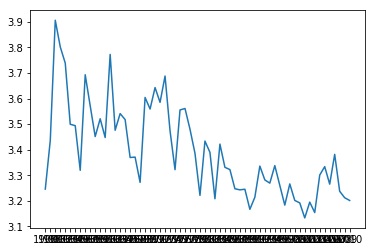

In [152]:
import matplotlib.pyplot as plt
# построим график зависимости между средним рейтингом 
plt.plot(year_rating['year'], year_rating['rating'])

In [ ]:
# Исходя из полученного рафика можно сделать вывод, что в среднем фильмы раньше были лучше